In [17]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
%run Utility.ipynb

In [3]:
# test 1: Conv2D (n,n,1), 8 filters
t1_syn = []
t1_sim = []
N1 = list(range(10, 55, 5))

for n in N1:
    # 1 input Channel
    m = keras.models.Sequential(name=f'N_{n}')
    m.add(keras.layers.Input((n,n,1)))
    m.add(keras.layers.Conv2D(8,(3,3)))
    r = synthesize_model(m, 'io_stream', 'ap_fixed<9,1>', 'Latency', cosim=True,  delete_files=True,
                         fake_sim_data=True)
    t1_syn.append(int(r['syn_latency_estimates']['avg']))
    t1_sim.append(int(r['reports']['sim_rpt']['AVER_LATENCY']))

Interpreting Sequential
Topology:
Layer name: input_1, layer type: InputLayer, current shape: [[None, 10, 10, 1]]
Layer name: conv2d, layer type: Conv2D, current shape: [[None, 10, 10, 1]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_2, layer type: InputLayer, current shape: [[None, 15, 15, 1]]
Layer name: conv2d_1, layer type: Conv2D, current shape: [[None, 15, 15, 1]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_3, layer type: InputLayer, current shape: [[None, 20, 20, 1]]
Layer name: conv2d_2, layer type: Conv2D, current shape: [[None, 20, 20, 1]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_4, layer type: InputLayer, current shape: [[None, 25, 25, 1]]
Layer name: conv2d_3, layer type: Conv2D, current shape: [[None, 25, 25, 1]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_5, layer t

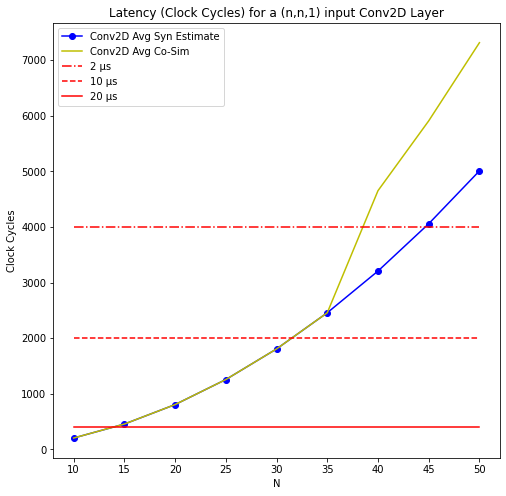

In [4]:
plt.figure(figsize=(8,8))
plt.plot(N1, t1_syn, 'b-o',
         N1, t1_sim, 'y-',
         [min(N1), max(N1)], [4000, 4000], 'r-.',
         [min(N1), max(N1)], [2000, 2000], 'r--',
         [min(N1), max(N1)], [400, 400], 'r-'
         )
         
plt.title('Latency (Clock Cycles) for a (n,n,1) input Conv2D Layer')
plt.xlabel('N')
plt.ylabel('Clock Cycles')
plt.legend(['Conv2D Avg Syn Estimate', 'Conv2D Avg Co-Sim', '2 μs', '10 μs', '20 μs'])
plt.show()

In [5]:
# test 2: Conv2D and SeparableConv2D (30,30,n), 8 filters
N2 = list(range(10,55,5))

t2_conv2d_syn = []
t2_conv2d_sim = []

t2_sep_conv2d_syn = []
t2_sep_conv2d_sim = []

for n in N2:
    try:
        m = keras.models.Sequential(name=f'N_{n}')
        m.add(keras.layers.Input((30,30,n)))
        m.add(keras.layers.Conv2D(8,(3,3)))
        r = synthesize_model(m, 'io_stream', 'ap_fixed<9,1>', 'Latency', cosim=True, delete_files=True,
                             fake_sim_data=True)
        t2_conv2d_syn.append(int(r['syn_latency_estimates']['avg']))
        t2_conv2d_sim.append(int(r['reports']['sim_rpt']['AVER_LATENCY']))
    except:
        # We have reached the limit for n with conv2d
        print('-'*50)
        print(f'Conv2D limit reached at n={n}')
        print('-'*50)
        break

for n in N2:
    m = keras.models.Sequential(name=f'N_{n}')
    m.add(keras.layers.Input((30,30,n)))
    m.add(keras.layers.SeparableConv2D(8, (3,3)))
    r = synthesize_model(m, 'io_stream', 'ap_fixed<9,1>', 'Latency', cosim=True, delete_files=True,
                         fake_sim_data=True)
    t2_sep_conv2d_syn.append(int(r['syn_latency_estimates']['avg']))
    t2_sep_conv2d_sim.append(int(r['reports']['sim_rpt']['AVER_LATENCY']))

Interpreting Sequential
Topology:
Layer name: input_10, layer type: InputLayer, current shape: [[None, 30, 30, 10]]
Layer name: conv2d_9, layer type: Conv2D, current shape: [[None, 30, 30, 10]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_11, layer type: InputLayer, current shape: [[None, 30, 30, 15]]
Layer name: conv2d_10, layer type: Conv2D, current shape: [[None, 30, 30, 15]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_12, layer type: InputLayer, current shape: [[None, 30, 30, 20]]
Layer name: conv2d_11, layer type: Conv2D, current shape: [[None, 30, 30, 20]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_13, layer type: InputLayer, current shape: [[None, 30, 30, 25]]
Layer name: conv2d_12, layer type: Conv2D, current shape: [[None, 30, 30, 25]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name:

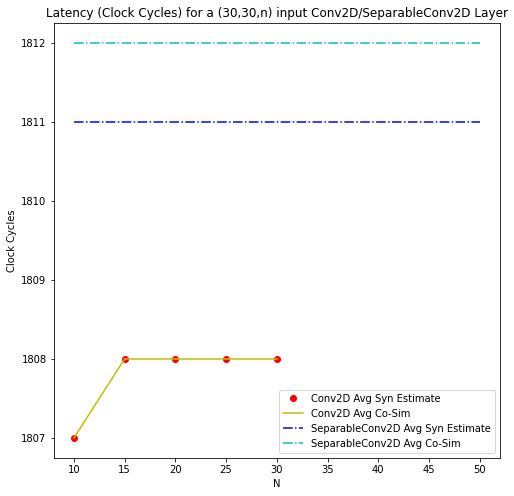

In [15]:
plt.figure(figsize=(8,8))
plt.plot(N2[:len(t2_conv2d_syn)], t2_conv2d_syn, 'ro',
         N2[:len(t2_conv2d_sim)], t2_conv2d_sim, 'y-',
         N2, t2_sep_conv2d_syn, 'b-.',
         N2, t2_sep_conv2d_sim, 'c-.')
plt.title('Latency (Clock Cycles) for a (30,30,n) input Conv2D/SeparableConv2D Layer')
plt.xlabel('N')
plt.ylabel('Clock Cycles')
plt.legend(['Conv2D Avg Syn Estimate', 'Conv2D Avg Co-Sim', 'SeparableConv2D Avg Syn Estimate', 
            'SeparableConv2D Avg Co-Sim'])
plt.show()

In [7]:
# test 3: Conv2D and SeparableConv2D (30,30,3), n kernels
# test 2: Conv2D and SeparableConv2D (30,30,n), 8 kernels
N3= list(range(10,55,5))

t3_conv2d_syn = []
t3_conv2d_sim = []

t3_sep_conv2d_syn = []
t3_sep_conv2d_sim = []

for n in N3:
    try:
        m = keras.models.Sequential(name=f'N_{n}')
        m.add(keras.layers.Input((30,30,3)))
        m.add(keras.layers.Conv2D(n,(3,3)))
        r = synthesize_model(m, 'io_stream', 'ap_fixed<9,1>', 'Latency', cosim=True, delete_files=True,
                             fake_sim_data=True)
        t3_conv2d_syn.append(int(r['syn_latency_estimates']['avg']))
        t3_conv2d_sim.append(int(r['reports']['sim_rpt']['AVER_LATENCY']))
    except:
        # We have reached the limit for n with conv2d
        print('-'*50)
        print(f'Conv2D limit reached at n={n}')
        print('-'*50)
        break

for n in N3:
    m = keras.models.Sequential(name=f'N_{n}')
    m.add(keras.layers.Input((30,30,3)))
    m.add(keras.layers.SeparableConv2D(8, (3,3)))
    r = synthesize_model(m, 'io_stream', 'ap_fixed<9,1>', 'Latency', cosim=True, delete_files=True,
                         fake_sim_data=True)
    t3_sep_conv2d_syn.append(int(r['syn_latency_estimates']['avg']))
    t3_sep_conv2d_sim.append(int(r['reports']['sim_rpt']['AVER_LATENCY']))

Interpreting Sequential
Topology:
Layer name: input_25, layer type: InputLayer, current shape: [[None, 30, 30, 3]]
Layer name: conv2d_15, layer type: Conv2D, current shape: [[None, 30, 30, 3]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_26, layer type: InputLayer, current shape: [[None, 30, 30, 3]]
Layer name: conv2d_16, layer type: Conv2D, current shape: [[None, 30, 30, 3]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_27, layer type: InputLayer, current shape: [[None, 30, 30, 3]]
Layer name: conv2d_17, layer type: Conv2D, current shape: [[None, 30, 30, 3]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_28, layer type: InputLayer, current shape: [[None, 30, 30, 3]]
Layer name: conv2d_18, layer type: Conv2D, current shape: [[None, 30, 30, 3]]
Creating HLS model
Writing HLS project
Done
Interpreting Sequential
Topology:
Layer name: input_

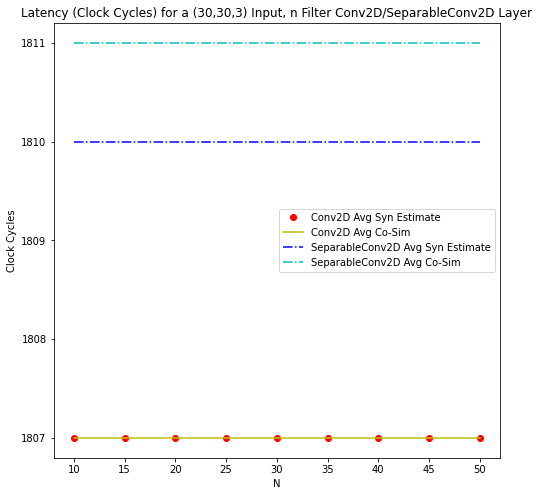

In [16]:
plt.figure(figsize=(8,8))
plt.plot(N3[:len(t3_conv2d_syn)], t3_conv2d_syn, 'ro',
         N3[:len(t3_conv2d_sim)], t3_conv2d_sim, 'y-',
         N3, t3_sep_conv2d_syn, 'b-.',
         N3, t3_sep_conv2d_sim, 'c-.')
plt.title('Latency (Clock Cycles) for a (30,30,3) Input, n Filter Conv2D/SeparableConv2D Layer')
plt.xlabel('N')
plt.ylabel('Clock Cycles')
plt.legend(['Conv2D Avg Syn Estimate', 'Conv2D Avg Co-Sim', 'SeparableConv2D Avg Syn Estimate', 
            'SeparableConv2D Avg Co-Sim'])
plt.yticks(range(1807, 1812))
plt.show()

In [19]:
# Save graph data as it is costly to generate
with open('CLS.pickle', 'wb') as fout:
    pickle.dump(
        (
            t1_syn,
            t1_sim,
            t2_conv2d_syn,
            t2_conv2d_sim,
            t2_sep_conv2d_syn,
            t2_sep_conv2d_sim,
            t3_conv2d_syn,
            t3_conv2d_sim,
            t3_sep_conv2d_syn,
            t3_sep_conv2d_sim
        ),
        fout
    )